# Assignment 1
Choose a personality on Wikipedia who
has the same name as yours, save it as a text document, and do the exercises given below on it.

Show your working to get credit for the following tasks:

1. convert the complete text to lower case.
2. remove all the stop words.
3. Apply POS tagging on the whole text
4. Lemmatize the most frequently occurring 5 adjectives
5. Stem the least frequently occurring 5 verbs.
6. Show the concordance for a word of your choice.
7. Draw the dispersion plot for 2 frequently occurring terms in the document.

### URL: https://en.wikipedia.org/wiki/Vishal_(actor)

In [36]:
import bs4
import requests
import nltk
import re
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
from collections import Counter
from nltk.text import Text
from collections import Counter
import matplotlib.pyplot as plt

In [37]:
res = requests.get("https://en.wikipedia.org/wiki/Vishal_(actor)")
corpus = bs4.BeautifulSoup(res.text,"html.parser")
for i in corpus.select('p'):
    print(i.getText())



Vishal Krishna Reddy (born 29 August 1977),[1] also known as Vishal, is an Indian actor and film producer who works at Tamil cinema. The younger son of film producer G. K. Reddy, Vishal studied Visual Communications at Loyola College, Chennai. Best known for his roles in action films, he produces films under his production company, Vishal Film Factory.[2]

Vishal made an entrance into the film industry as an assistant director for Arjun. He then became an actor and played his first lead role in the romantic thriller Chellamae (2004), before going on to star in the commercially successful action films Sandakozhi, Thimiru, Thaamirabharani and Malaikottai.[3] Following a series of unsuccessful films at the box office, Vishal chose to create his own production studio and has since produced and worked on profitable ventures such as Pandiya Naadu (2013), Naan Sigappu Manithan (2014) and Poojai (2014).[4]

Vishal was elected as the General Secretary of the Nadigar Sangam in October 2015 aft

In [38]:
text = " "
for paragraph in corpus.select('p'):
    text += paragraph.text

In [39]:
text

' \nVishal Krishna Reddy (born 29 August 1977),[1] also known as Vishal, is an Indian actor and film producer who works at Tamil cinema. The younger son of film producer G. K. Reddy, Vishal studied Visual Communications at Loyola College, Chennai. Best known for his roles in action films, he produces films under his production company, Vishal Film Factory.[2]\nVishal made an entrance into the film industry as an assistant director for Arjun. He then became an actor and played his first lead role in the romantic thriller Chellamae (2004), before going on to star in the commercially successful action films Sandakozhi, Thimiru, Thaamirabharani and Malaikottai.[3] Following a series of unsuccessful films at the box office, Vishal chose to create his own production studio and has since produced and worked on profitable ventures such as Pandiya Naadu (2013), Naan Sigappu Manithan (2014) and Poojai (2014).[4]\nVishal was elected as the General Secretary of the Nadigar Sangam in October 2015 a

### 1. convert the complete text to lower case.

In [40]:
text.lower()

' \nvishal krishna reddy (born 29 august 1977),[1] also known as vishal, is an indian actor and film producer who works at tamil cinema. the younger son of film producer g. k. reddy, vishal studied visual communications at loyola college, chennai. best known for his roles in action films, he produces films under his production company, vishal film factory.[2]\nvishal made an entrance into the film industry as an assistant director for arjun. he then became an actor and played his first lead role in the romantic thriller chellamae (2004), before going on to star in the commercially successful action films sandakozhi, thimiru, thaamirabharani and malaikottai.[3] following a series of unsuccessful films at the box office, vishal chose to create his own production studio and has since produced and worked on profitable ventures such as pandiya naadu (2013), naan sigappu manithan (2014) and poojai (2014).[4]\nvishal was elected as the general secretary of the nadigar sangam in october 2015 a

In [41]:
text = text.lower()

### 2. remove all the stop words.

In [42]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words("english"):
            new_text.append("")
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [10]:
remove_stopwords(text)

'vishal krishna reddy (born 29 august 1977),[1] also known  vishal,   indian actor  film producer  works  tamil cinema.  younger son  film producer g. k. reddy, vishal studied visual communications  loyola college, chennai. best known   roles  action films,  produces films   production company, vishal film factory.[2] vishal made  entrance   film industry   assistant director  arjun.   became  actor  played  first lead role   romantic thriller chellamae (2004),  going   star   commercially successful action films sandakozhi, thimiru, thaamirabharani  malaikottai.[3] following  series  unsuccessful films   box office, vishal chose  create   production studio   since produced  worked  profitable ventures   pandiya naadu (2013), naan sigappu manithan (2014)  poojai (2014).[4] vishal  elected   general secretary   nadigar sangam  october 2015  initiating  movement   previous committee.[5]   expelled  tamil film producers\' council (tfpc)  remarks   council.[6][7] later  april 2017,    elec

In [10]:
text = remove_stopwords(text)

In [11]:
text

'vishal krishna reddy (born 29 august 1977),[1] also known  vishal,   indian actor  film producer  works  tamil cinema.  younger son  film producer g. k. reddy, vishal studied visual communications  loyola college, chennai. best known   roles  action films,  produces films   production company, vishal film factory.[2] vishal made  entrance   film industry   assistant director  arjun.   became  actor  played  first lead role   romantic thriller chellamae (2004),  going   star   commercially successful action films sandakozhi, thimiru, thaamirabharani  malaikottai.[3] following  series  unsuccessful films   box office, vishal chose  create   production studio   since produced  worked  profitable ventures   pandiya naadu (2013), naan sigappu manithan (2014)  poojai (2014).[4] vishal  elected   general secretary   nadigar sangam  october 2015  initiating  movement   previous committee.[5]   expelled  tamil film producers\' council (tfpc)  remarks   council.[6][7] later  april 2017,    elec

### 3. Apply POS tagging on the whole text

In [12]:
text_tokens = re.findall("[\w']+",text)

In [13]:
text_tokens

['vishal',
 'krishna',
 'reddy',
 'born',
 '29',
 'august',
 '1977',
 '1',
 'also',
 'known',
 'vishal',
 'indian',
 'actor',
 'film',
 'producer',
 'works',
 'tamil',
 'cinema',
 'younger',
 'son',
 'film',
 'producer',
 'g',
 'k',
 'reddy',
 'vishal',
 'studied',
 'visual',
 'communications',
 'loyola',
 'college',
 'chennai',
 'best',
 'known',
 'roles',
 'action',
 'films',
 'produces',
 'films',
 'production',
 'company',
 'vishal',
 'film',
 'factory',
 '2',
 'vishal',
 'made',
 'entrance',
 'film',
 'industry',
 'assistant',
 'director',
 'arjun',
 'became',
 'actor',
 'played',
 'first',
 'lead',
 'role',
 'romantic',
 'thriller',
 'chellamae',
 '2004',
 'going',
 'star',
 'commercially',
 'successful',
 'action',
 'films',
 'sandakozhi',
 'thimiru',
 'thaamirabharani',
 'malaikottai',
 '3',
 'following',
 'series',
 'unsuccessful',
 'films',
 'box',
 'office',
 'vishal',
 'chose',
 'create',
 'production',
 'studio',
 'since',
 'produced',
 'worked',
 'profitable',
 'ventures'

In [14]:
nltk.pos_tag(text_tokens)

[('vishal', 'JJ'),
 ('krishna', 'NN'),
 ('reddy', 'NN'),
 ('born', 'VBD'),
 ('29', 'CD'),
 ('august', 'JJ'),
 ('1977', 'CD'),
 ('1', 'CD'),
 ('also', 'RB'),
 ('known', 'VBN'),
 ('vishal', 'JJ'),
 ('indian', 'JJ'),
 ('actor', 'NN'),
 ('film', 'NN'),
 ('producer', 'NN'),
 ('works', 'VBZ'),
 ('tamil', 'RB'),
 ('cinema', 'JJ'),
 ('younger', 'JJR'),
 ('son', 'NN'),
 ('film', 'NN'),
 ('producer', 'NN'),
 ('g', 'NN'),
 ('k', 'NN'),
 ('reddy', 'JJ'),
 ('vishal', 'NN'),
 ('studied', 'VBD'),
 ('visual', 'JJ'),
 ('communications', 'NNS'),
 ('loyola', 'VBP'),
 ('college', 'NN'),
 ('chennai', 'NN'),
 ('best', 'RBS'),
 ('known', 'VBN'),
 ('roles', 'NNS'),
 ('action', 'NN'),
 ('films', 'NNS'),
 ('produces', 'VBZ'),
 ('films', 'NNS'),
 ('production', 'NN'),
 ('company', 'NN'),
 ('vishal', 'NN'),
 ('film', 'NN'),
 ('factory', 'NN'),
 ('2', 'CD'),
 ('vishal', 'NN'),
 ('made', 'VBD'),
 ('entrance', 'NN'),
 ('film', 'NN'),
 ('industry', 'NN'),
 ('assistant', 'NN'),
 ('director', 'NN'),
 ('arjun', 'NN'),
 

In [15]:
new_text = nltk.pos_tag(text_tokens)

In [16]:
print(new_text)

[('vishal', 'JJ'), ('krishna', 'NN'), ('reddy', 'NN'), ('born', 'VBD'), ('29', 'CD'), ('august', 'JJ'), ('1977', 'CD'), ('1', 'CD'), ('also', 'RB'), ('known', 'VBN'), ('vishal', 'JJ'), ('indian', 'JJ'), ('actor', 'NN'), ('film', 'NN'), ('producer', 'NN'), ('works', 'VBZ'), ('tamil', 'RB'), ('cinema', 'JJ'), ('younger', 'JJR'), ('son', 'NN'), ('film', 'NN'), ('producer', 'NN'), ('g', 'NN'), ('k', 'NN'), ('reddy', 'JJ'), ('vishal', 'NN'), ('studied', 'VBD'), ('visual', 'JJ'), ('communications', 'NNS'), ('loyola', 'VBP'), ('college', 'NN'), ('chennai', 'NN'), ('best', 'RBS'), ('known', 'VBN'), ('roles', 'NNS'), ('action', 'NN'), ('films', 'NNS'), ('produces', 'VBZ'), ('films', 'NNS'), ('production', 'NN'), ('company', 'NN'), ('vishal', 'NN'), ('film', 'NN'), ('factory', 'NN'), ('2', 'CD'), ('vishal', 'NN'), ('made', 'VBD'), ('entrance', 'NN'), ('film', 'NN'), ('industry', 'NN'), ('assistant', 'NN'), ('director', 'NN'), ('arjun', 'NN'), ('became', 'VBD'), ('actor', 'JJ'), ('played', 'VBD')

### 4. Lemmatize the most frequently occurring 5 adjectives

In [17]:
print([word for word,pos in new_text if pos == 'JJ' or pos=='JJR' or pos=='JJS'])

['vishal', 'august', 'vishal', 'indian', 'cinema', 'younger', 'reddy', 'visual', 'actor', 'first', 'lead', 'romantic', 'successful', 'thimiru', 'unsuccessful', 'profitable', 'naadu', 'naan', 'general', 'october', 'previous', 'april', 'vishal', 'august', 'reddy', 'actor', 'several', 'degree', 'visual', 'sarja', 'vishal', 'protagonist', 'critic', 'plenty', 'next', "father's", 'assistant', 'improved', 'chellamae', 'fastest', 'appear', "gopi's", 'mixed', 'intense', 'critic', "film's", 'weak', 'poor', "vishal's", 'third', 'consecutive', 'commercial', 'emerge', 'tamil', 'next', 'political', 'favourable', 'next', 'january', 'considerable', 'good', 'big', 'later', 'boopathy', 'full', 'comic', 'mixed', 'young', 'whilst', 'able', 'average', 'masala', 'large', 'top', 'first', 'vishal', 'portrayed', 'commercial', 'box', 'bilingual', 'dark', 'severe', 'serious', 'muscular', 'mixed', "vishal's", 'positive', 'give', 'spontaneous', 'front', 'vishal', 'police', 'vedi', 'instant', 'forest', 'cameo', 'ya

In [18]:
L_text=[word for word,pos in new_text if pos == 'JJ' or pos=='JJR' or pos=='JJS']

In [19]:
MFL = FreqDist(L_text)

In [20]:
MFL.most_common(5)

[('vishal', 7), ('mixed', 5), ('next', 3), ('commercial', 3), ('average', 3)]

In [21]:
for v,k in MFL.items():
   print (v)

vishal
august
indian
cinema
younger
reddy
visual
actor
first
lead
romantic
successful
thimiru
unsuccessful
profitable
naadu
naan
general
october
previous
april
several
degree
sarja
protagonist
critic
plenty
next
father's
assistant
improved
chellamae
fastest
appear
gopi's
mixed
intense
film's
weak
poor
vishal's
third
consecutive
commercial
emerge
tamil
political
favourable
january
considerable
good
big
later
boopathy
full
comic
young
whilst
able
average
masala
large
top
portrayed
box
bilingual
dark
severe
serious
muscular
positive
give
spontaneous
front
police
vedi
instant
forest
cameo
yaanai
thiru
prepare
real
acted
second
paayum
marudhu
sandai
flop
main
detective
british
major
newcomer
n
linguswamy
sundar
february
staunch
online
anti
sun
independent
vacant
tried
nagar
fulfil
unreleased


### 5. Stem the least frequently occurring 5 verbs.

In [22]:
ct=0
lt=[]
for v in sorted(new_text,key=new_text.count):
    if v[1] == ('VBD' or 'VB' or 'VBG' or 'VBN' or 'VBP'):
        if v[0] not in lt:
            lt.append(v[0])
            ct= ct+1
    if ct == 5:
        break

In [23]:
lt

['studied', 'malaikottai', 'worked', 'sangam', 'expelled']

In [24]:
ps = PorterStemmer()

In [25]:
for w in lt:
    print(w,"-->",ps.stem(w))

studied --> studi
malaikottai --> malaikottai
worked --> work
sangam --> sangam
expelled --> expel


### 6.Show the concordance for a word of your choice.

In [26]:
text_C = Text(text_tokens) 

In [27]:
text_C.concordance("successful")

Displaying 2 of 2 matches:
amae 2004 going star commercially successful action films sandakozhi thimiru t
tten directed n linguswamy sequel successful sandakozhi 2005 film stars vishal


### 7.Draw the dispersion plot for 2 frequently occurring terms in the document.

In [28]:
FO = FreqDist(text_tokens)

In [29]:
FO.most_common(2)

[('vishal', 32), ('film', 30)]

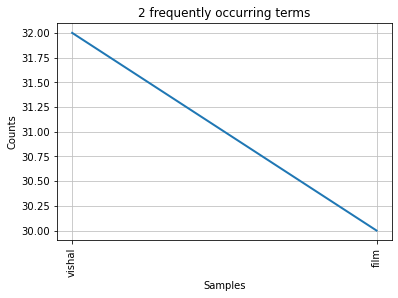

In [30]:
FO.plot(2, title='2 frequently occurring terms')
plt.show()

In [31]:
from nltk.draw.dispersion import dispersion_plot

In [32]:
targets=['vishal',"film"]

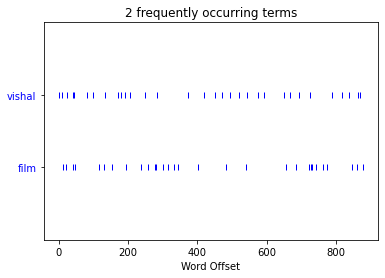

In [33]:
dispersion_plot(text_tokens, targets, title='2 frequently occurring terms')